In [1]:
#Sign In Sheet
#Lacey Woodbury
#Brett
#Kyle Dircksen
#Jeny Powell
#Kenzie Mitzner
#David Blazek

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import scipy.stats as stats 
from scipy.stats import chi2_contingency

In [15]:
# Name the dataframe as "data" and review the headers and first five records.
data = pd.read_csv("C:/Users/alisa/Desktop/DataScienceLiveProject/GooglePlayStore/DavidB/googleplaystoremaster.csv")
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
data.info()  #Review the data types of all 13 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
data.Genres.unique()       # Calls for the unique values in the "Genre" column in the dataframe.

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [18]:
data.Genres.nunique()  # Finds the number of unique values in the column "Genres".

120

In [19]:
pd.value_counts(data.Genres)  # Finds the number of records for each unique Genres.

Tools                         842
Entertainment                 623
Education                     549
Medical                       463
Business                      460
                             ... 
Role Playing;Brain Games        1
Board;Pretend Play              1
Health & Fitness;Education      1
Puzzle;Education                1
Communication;Creativity        1
Name: Genres, Length: 120, dtype: int64

In [20]:
data.Installs.str.replace('+', '')  # Objective: Clean the "Installs" column by removing the "+" from the end of each number,
                                    # remove the commas and change the data type from object to float. This first step removes
                                    # the "+".

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10841, dtype: object

In [21]:
data['Installs'] = (data['Installs'].str.replace('+', ''))  # The above code worked in the displayed array so I performed 
data.head()                                                 # the action in the DataFrame. 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
data['Installs'] = (data['Installs'].str.replace(",",""))  # Remove the comma from each cell in the "Installs" column.

In [23]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
data.info()    # Review the information to determine if the "Installs" data type is still "object". The intent is to convert
               # the data type to "float64" for math purposes.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [25]:
data['Installs'] = (data['Installs'].astype(float))  # This function indicates "Free" in the last error line. This indicates 
                                                    # an out-of-trend value in this column. The next task will be to find
                                                    # how to find the "Free" in the column and then remove or fix the row.

ValueError: could not convert string to float: 'Free'

In [26]:
data.Installs.unique()  # THis shows every unique item in the Installs column. The item 'Free' shows up and now to
                        # find and remove or fix this row.

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [27]:
data.loc[data['Installs'] == 'Free']    # Determine the record where the Installs value equals "Free".

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [28]:
df1 = data.drop([10472])    # I chose to remove the row. Create a new dataframe called df1 that includes all rows where
                                # the value of a cell in the Installs column does not equal “Free”

In [29]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [31]:
df1.Installs.unique()  # Check to see that 'Free' was removed from the dataframe. "Free" no longer shows.


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [32]:
df1['Installs'] = (df1['Installs'].astype(float))  # Change the "Installs" column type from "object" to the type "float".
                                                                                

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [34]:
df1['Installs'] 

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

In [35]:
df1['Price'] = (df1['Price'].str.replace("$",""))  # Remove the dollar sign from each cell in the "Price" column.

In [36]:
df1['Price'] = (df1['Price'].astype(float))  # Change the "Price column type from "object" to the type "float".

In [37]:
df1.info()  # Check to ensure that the "Price" column is a float type. Also, the number of records
            # dropped from 10841 to 10840.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [38]:
total_installs = df1.groupby(['Genres']).Installs.sum()  # Find the total for each "Installs" unique value.
total_installs.head()

Genres
Action                          9.342039e+09
Action;Action & Adventure       8.802050e+07
Adventure                       4.066953e+08
Adventure;Action & Adventure    9.061500e+08
Adventure;Brain Games           1.000000e+05
Name: Installs, dtype: float64

In [39]:
df1.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [40]:
df1.Installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [41]:
pd.value_counts(df1.Price)  # Finds the number of records for each unique Genres.

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

In [42]:
df1 = df1.loc[df1['Category'] == 'ENTERTAINMENT'] 

In [43]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
855,Netflix,ENTERTAINMENT,4.4,5456208,Varies with device,100000000.0,Free,0.00,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,4.5M,1000000.0,Free,0.00,Everyone,Entertainment,"January 20, 2018",1.02,4.0.3 and up
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,Varies with device,1000000.0,Free,0.00,Teen,Entertainment,"August 4, 2018",Varies with device,Varies with device
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,11M,10000000.0,Free,0.00,Teen,Entertainment,"July 15, 2018",2.13.5,4.1 and up
859,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,50000000.0,Free,0.00,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Meme Creator,ENTERTAINMENT,4.2,38769,44M,1000000.0,Free,0.00,Mature 17+,Entertainment,"September 22, 2015",7.2.3,2.3 and up
1000,"Imgur: Find funny GIFs, memes & watch viral vi...",ENTERTAINMENT,4.3,160164,12M,10000000.0,Free,0.00,Teen,Entertainment,"August 1, 2018",4.2.0.8447,5.0 and up
1001,Meme Generator,ENTERTAINMENT,4.6,3771,53M,100000.0,Paid,2.99,Mature 17+,Entertainment,"August 3, 2018",4.426,4.1 and up
1002,SketchBook - draw and paint,ENTERTAINMENT,4.3,256664,77M,10000000.0,Free,0.00,Everyone,Entertainment,"May 4, 2018",4.1.7,4.0.3 and up


In [44]:
df1.Price.unique()

array([0.  , 4.99, 2.99])

In [45]:
df1.Installs.unique()

array([1.e+08, 1.e+06, 1.e+07, 5.e+07, 5.e+06, 1.e+09, 1.e+05, 5.e+05,
       5.e+04, 1.e+04])

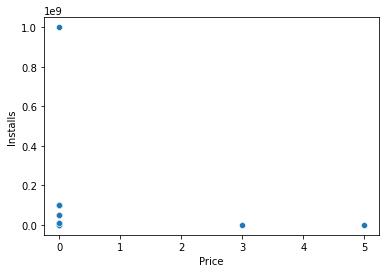

In [46]:
sns.scatterplot(x="Price", y="Installs", data=df1);

<AxesSubplot:xlabel='Price', ylabel='Installs'>

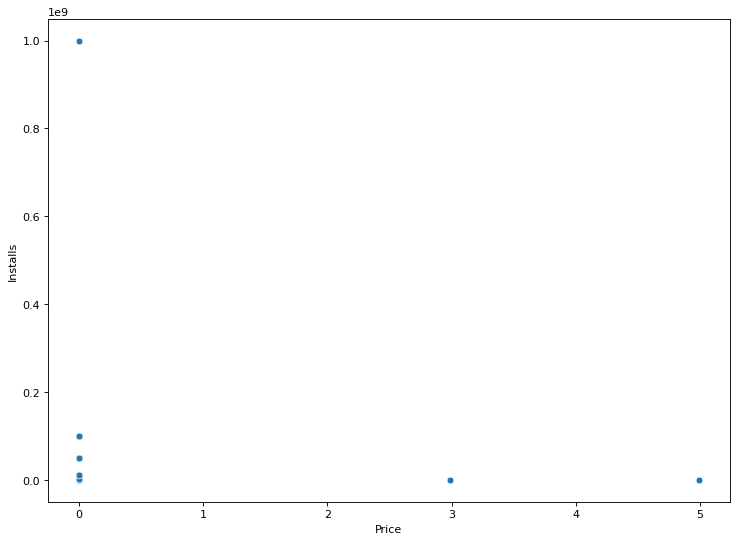

In [47]:
from matplotlib import rcParams
plt.figure(figsize=(11, 8), dpi=80)
sns.scatterplot(
    data=df1, x="Price", y="Installs", 
    sizes=(20, 200), hue_norm=(0, 7), legend="full", )

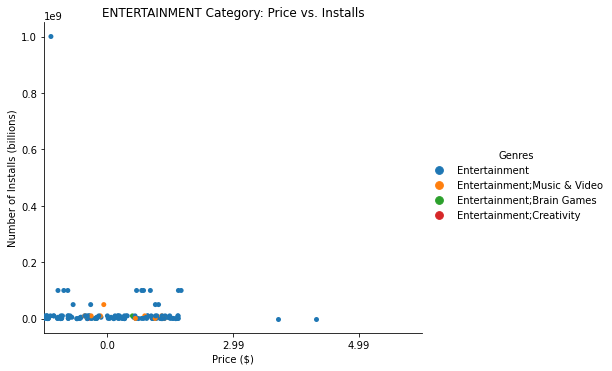

In [48]:
# View a scatterplot of the Price vs. Installs data.
g = sns.catplot(x="Price", y="Installs", hue="Genres",
                data=df1,
                height=5, aspect=1.2, jitter=0.6)
plt.title("ENTERTAINMENT Category: Price vs. Installs")
plt.xlabel("Price ($)")
plt.ylabel("Number of Installs (billions)");

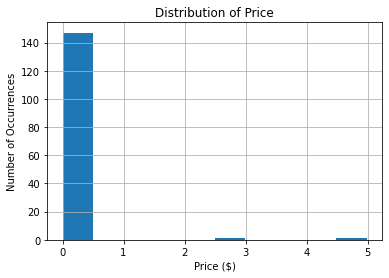

In [49]:
hist = df1['Price'].hist()
plt.title("Distribution of Price")
plt.xlabel("Price ($)")
plt.ylabel("Number of Occurrences")
plt.show()



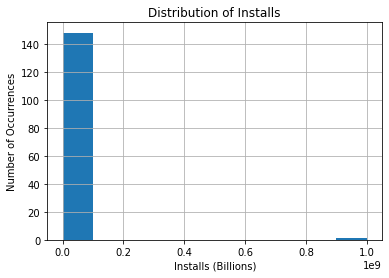

In [50]:
hist = df1['Installs'].hist() 
plt.title("Distribution of Installs")
plt.xlabel("Installs (Billions)")
plt.ylabel("Number of Occurrences")
plt.show()

In [51]:
from scipy.stats import jarque_bera, normaltest
jb_stats = jarque_bera(df1['Installs'])
norm_stats = normaltest(df1['Installs'])

print("Jarque-Bera test statistic is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistic is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistic is 90928.15178564422 and p value is 0.0
Normality test statistic is 303.13223657286176 and p value is 1.498549816065254e-66


In [52]:
df1_price_0 = df1.loc[df1['Price'] == 0]

In [53]:
df1_price_0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
855,Netflix,ENTERTAINMENT,4.4,5456208,Varies with device,100000000.0,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,4.5M,1000000.0,Free,0.0,Everyone,Entertainment,"January 20, 2018",1.02,4.0.3 and up
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,Varies with device,1000000.0,Free,0.0,Teen,Entertainment,"August 4, 2018",Varies with device,Varies with device
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,11M,10000000.0,Free,0.0,Teen,Entertainment,"July 15, 2018",2.13.5,4.1 and up
859,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,50000000.0,Free,0.0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up


In [54]:
df1_price_299 = df1.loc[df1['Price'] == 2.99]

In [55]:
df1_price_499 = df1.loc[df1['Price'] == 4.99]

In [56]:
df1_price_299.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1001,Meme Generator,ENTERTAINMENT,4.6,3771,53M,100000.0,Paid,2.99,Mature 17+,Entertainment,"August 3, 2018",4.426,4.1 and up


In [57]:
df1_price_499.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,100000.0,Paid,4.99,Everyone,Entertainment,"June 30, 2018",Varies with device,Varies with device


In [58]:
stats.kruskal(df1_price_0['Installs'], df1_price_299['Installs'], df1_price_499['Installs'])

KruskalResult(statistic=5.286371761708344, pvalue=0.0711342828223119)

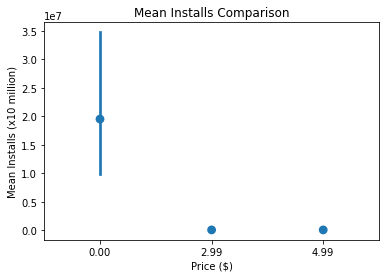

In [59]:
mean_comparison = sns.pointplot(data=[df1_price_0['Installs'], df1_price_299['Installs'], df1_price_499['Installs']], join=False)
mean_comparison.set(xticklabels = ['0.00', '2.99', '4.99'])
plt.title("Mean Installs Comparison"),
plt.ylabel("Mean Installs (x10 million)"),
plt.xlabel("Price ($)");

In [60]:
contingency= pd.crosstab(df1['Price'], df1['Installs'])    # Run Chi-Square test by converting the data into a
                                                            # contingency table with frequencies.

In [61]:
contingency


Installs,1.000000e+04,5.000000e+04,1.000000e+05,5.000000e+05,1.000000e+06,5.000000e+06,1.000000e+07,5.000000e+07,1.000000e+08,1.000000e+09
Price,,,,,,,,,,
0.00,1,1,9,4,51,17,48,5,10,1
2.99,0,0,1,0,0,0,0,0,0,0
4.99,0,0,1,0,0,0,0,0,0,0


In [62]:
c, p, dof, expected = chi2_contingency(contingency)   # Chi-square test of independence.
print(p)    # Print the p-value.

0.11346474433287723


In [63]:
print(c)    # Print the Chi-Squared value (the test statistic).

25.43228200371057


In [64]:
print(p)    # Print the p-value.

0.11346474433287723


In [65]:
print(dof)    # # Print the degrees of freedom.

18


In [66]:
print(expected)    # The expected frequencies, based on the marginal sums of the table.

[[9.86577181e-01 9.86577181e-01 1.08523490e+01 3.94630872e+00
  5.03154362e+01 1.67718121e+01 4.73557047e+01 4.93288591e+00
  9.86577181e+00 9.86577181e-01]
 [6.71140940e-03 6.71140940e-03 7.38255034e-02 2.68456376e-02
  3.42281879e-01 1.14093960e-01 3.22147651e-01 3.35570470e-02
  6.71140940e-02 6.71140940e-03]
 [6.71140940e-03 6.71140940e-03 7.38255034e-02 2.68456376e-02
  3.42281879e-01 1.14093960e-01 3.22147651e-01 3.35570470e-02
  6.71140940e-02 6.71140940e-03]]
